**Autor:** *Melissa Gatica Arriola*

# Tema: "Modelo de Ising"



---





1. Escribir un código que calcule la energía E y la magnetización M del modelo de Ising para una configuración φ. La magnetización es el parámetro de orden del sistema. Está definida por

$$
M = ∑_i \frac{s_i}{L^2} = ∑_{i,i=1} \frac{Φ(i,j)}{L^2}
.
$$


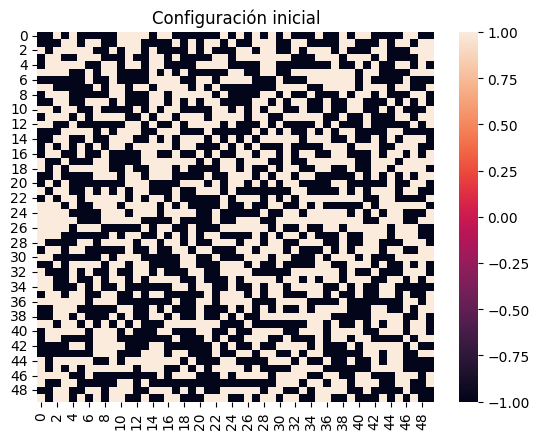

In [ ]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Definiendo variables
J = 1
H = 4
L = 50
T = np.linspace(0.1, 10, 100)
temperatures = np.linspace(0.1, 10, 100)
iteraciones = 15000

# Generar red inicial aleatoria
red = np.random.choice([-1, 1], size=(L, L))
phi = np.random.choice([-1, 1], size=(L, L))

# Visualización inicial
sns.heatmap(red)
plt.title("Configuración inicial")
plt.show()


# Funcion para calcular energia
def calcular_energia(red, J, H):
  E_0 = 0
  magnetizacion = 0

  for i in range(L):
      for j in range(L):
          # Suma de interacciones con vecinos
          vecinos = (
              red[(i + 1) % L, j] +
              red[(i - 1) % L, j] +
              red[i, (j + 1) % L] +
              red[i, (j - 1) % L]
          )
          # Energía total
          E_0 += -J * red[i, j] * vecinos - H * red[i, j]
          # Magnetización
          magnetizacion += red[i, j]/(L*L)

  # Dividir la energía para evitar el doble conteo
  return E_0 / 2, magnetizacion



In [ ]:
# Resultados
E_0, magnetizacion_0 = calcular_energia(red, J, H)
print(f"Energía inicial: {E_0}")
print(f"Magnetización inicial: {magnetizacion_0}")


Energía inicial: 92.0
Magnetización inicial: -0.0096


Escribir un código que implemente el algoritmo de Metrópolis para este
sistema. La variación de la energía dada por el cambio de espín φ (i, j)
está dada por

$$
Δ E=2JΦ(i,j)(Φ(i+1,j)+\phi(i-1,j)+\phi(i,j+1)+Φ(i,j-1))+2HΦ(i,j)
$$

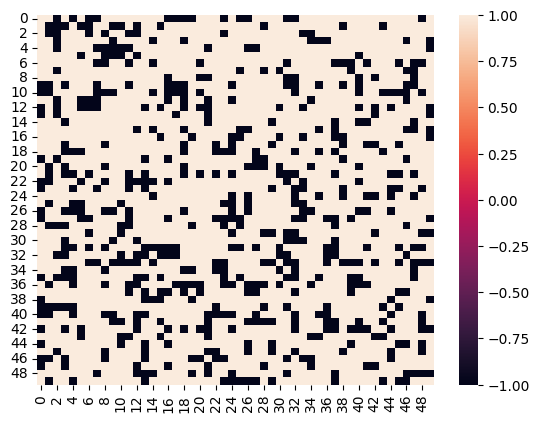

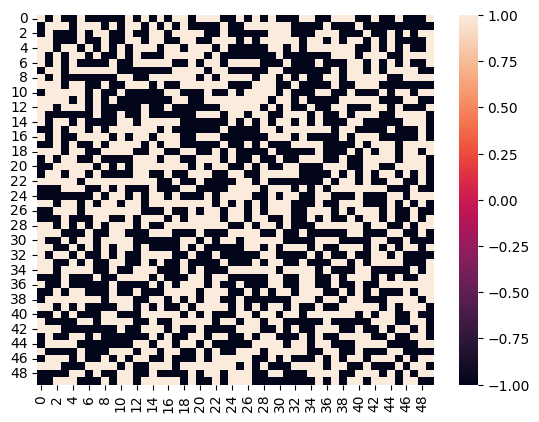

In [ ]:
#Algoritmo Metropolis para simular la evolucion en el tiempo

def metropolis(red, J, H, T, iteraciones):
    for _ in range(iteraciones):
        i, j = np.random.randint(0, L, size=2)
        delta_E = 2 * J * red[i, j] * (
            red[(i + 1) % L, j] +
            red[(i - 1) % L, j] +
            red[i, (j + 1) % L] +
            red[i, (j - 1) % L]
        ) + 2 * H * red[i, j]

        if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
            red[i, j] = -red[i, j]
    return red

# Simulación para distintas temperaturas
M = []  # Magnetización promedio
E_total = []  # Energía promedio

for T in temperatures:
    red = metropolis(red, J, H, T, iteraciones)
    E = calcular_energia(red, J, H)
    M.append(np.mean(red))  # Promedio de espines
    E_total.append(E)  # Energía total

sns.heatmap(red)
plt.show()
sns.heatmap(red0)
plt.show()



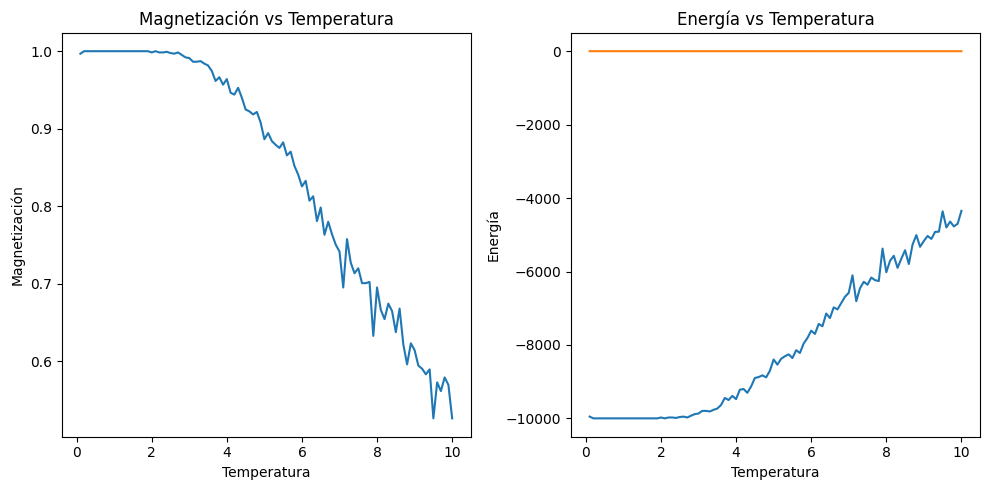

In [ ]:
# Gráficos de resultados
plt.figure(figsize=(10, 5))

# Magnetización vs Temperatura
plt.subplot(1, 2, 1)
plt.plot(temperatures, M)
plt.xlabel('Temperatura')
plt.ylabel('Magnetización')
plt.title('Magnetización vs Temperatura')

# Energía vs Temperatura
plt.subplot(1, 2, 2)
plt.plot(temperatures, E_total)
plt.xlabel('Temperatura')
plt.ylabel('Energía')
plt.title('Energía vs Temperatura')

plt.tight_layout()
plt.show()

3. Elegimos ahora a L = 10, H = 0, J = 1, β = 1/T. Consideramos un
arranque en frío y uno en caliente que están dados por φ (i, j) = +1 para
todo i, j y φ (i, j) con signos aleatorios. Ejecute el algoritmo de Metrópolis
para un tiempo de termalización T T = 213 y estudiar la evolución de la
energía y la magnetización para distintos valores de temperatura (elija una
temperatura baja T = 0,1, una media T = 3 y una alta T = 100). Recorte
los tiempos en las gráficas si es necesario.

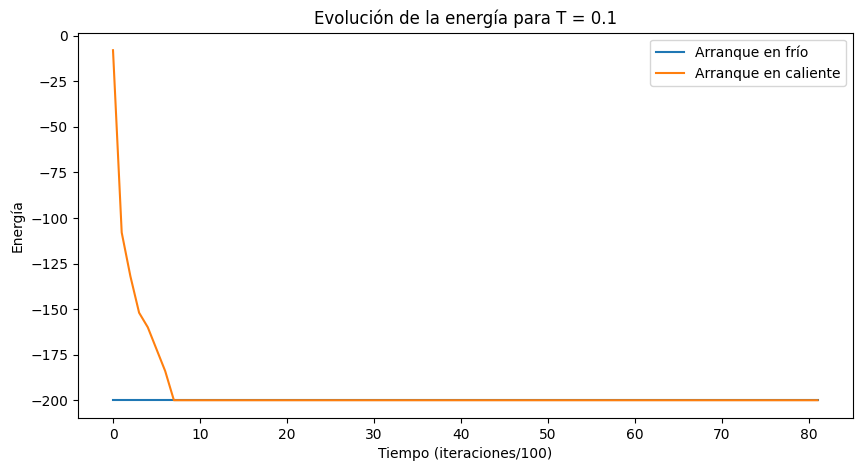

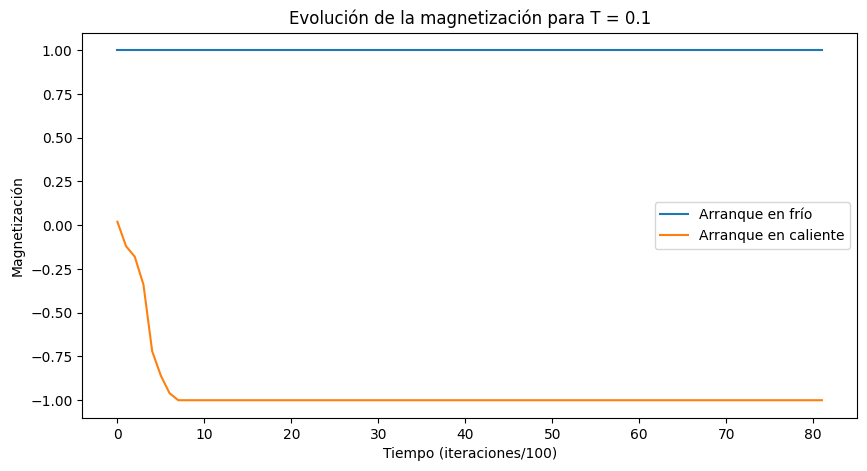

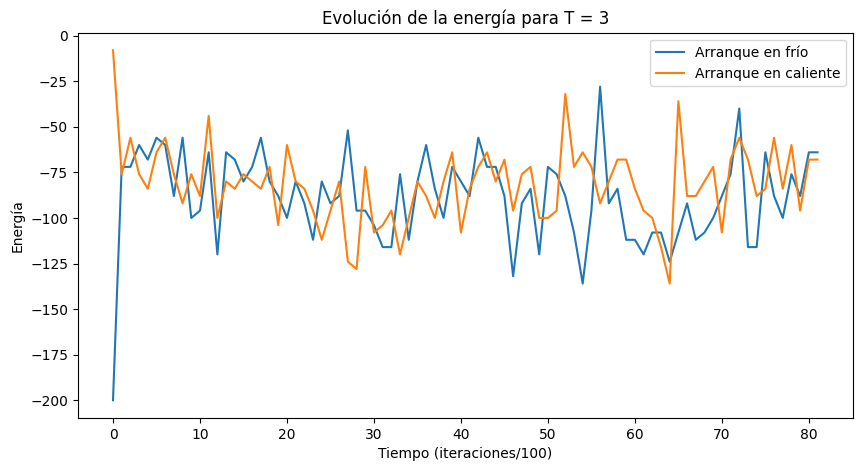

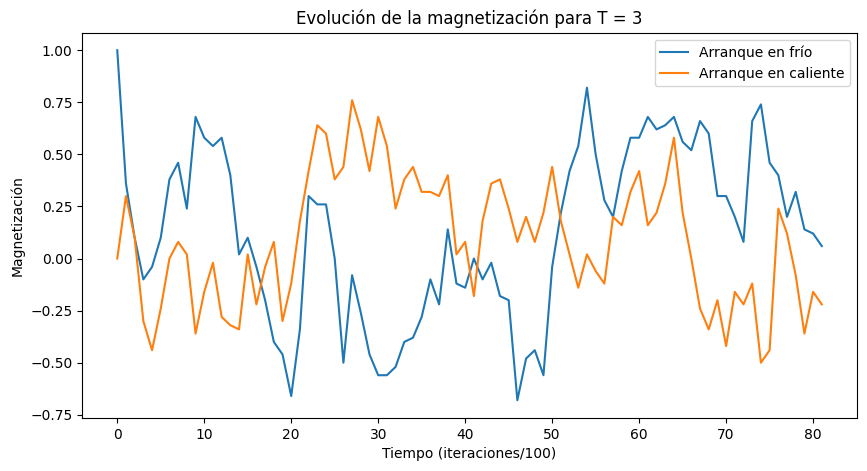

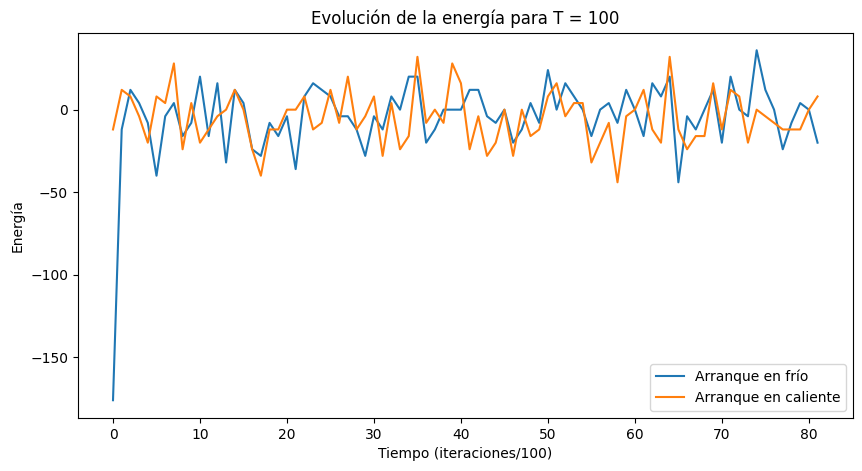

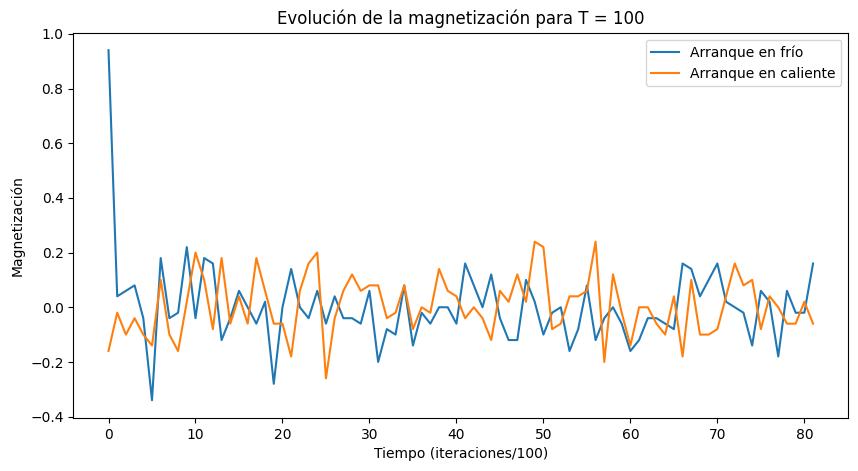

In [ ]:
temperatures = [0.1, 3, 100]
L = 10
J = 1
H = 0
red = np.random.choice([-1, 1], size=(L, L))
TT = 2**13

# Inicialización y simulación
for T in temperatures:
    # Condiciones iniciales
    red_frio = np.ones((L, L))  # Arranque en frío
    red_caliente = np.random.choice([-1, 1], size=(L, L))  # Arranque en caliente

# Almacenar resultados
    energia_frio, magnetizacion_frio = [], []
    energia_caliente, magnetizacion_caliente = [], []

# Simular para cada paso de tiempo
    for t in range(TT):
        metropolis(red_frio, J, H, T, 3)
        metropolis(red_caliente, J, H, T, 3)

        if t % 100 == 0:  # Guardar resultados cada 100 pasos
            E_f, M_f = calcular_energia(red_frio, J, H)
            E_c, M_c = calcular_energia(red_caliente, J, H)

            energia_frio.append(E_f)
            magnetizacion_frio.append(M_f)
            energia_caliente.append(E_c)
            magnetizacion_caliente.append(M_c)


    # Graficar energía
    plt.figure(figsize=(10, 5))
    plt.plot(energia_frio, label='Arranque en frío')
    plt.plot(energia_caliente, label='Arranque en caliente')
    plt.title(f"Evolución de la energía para T = {T}")
    plt.xlabel("Tiempo (iteraciones/100)")
    plt.ylabel("Energía")
    plt.legend()
    plt.show()

    # Graficar magnetización
    plt.figure(figsize=(10, 5))
    plt.plot(magnetizacion_frio, label='Arranque en frío')
    plt.plot(magnetizacion_caliente, label='Arranque en caliente')
    plt.title(f"Evolución de la magnetización para T = {T}")
    plt.xlabel("Tiempo (iteraciones/100)")
    plt.ylabel("Magnetización")
    plt.legend()
    plt.show()

4. Calcule el calor específico y la susceptibilidad del sistema definidas por
$$
C_v = \frac{\partial E}{\partial β} = \frac{β}{T}(<E^2>-<E>^2)
$$

$$
𝘟 = \frac{\partial M}{\partial H}= β (<M^2>- <M>^2)
$$

Determinar el punto crítico y comparar el resultado con el resultado teórico

$$
K_BT_c= \frac{2J}{ln(\sqrt(2)+1)}
$$

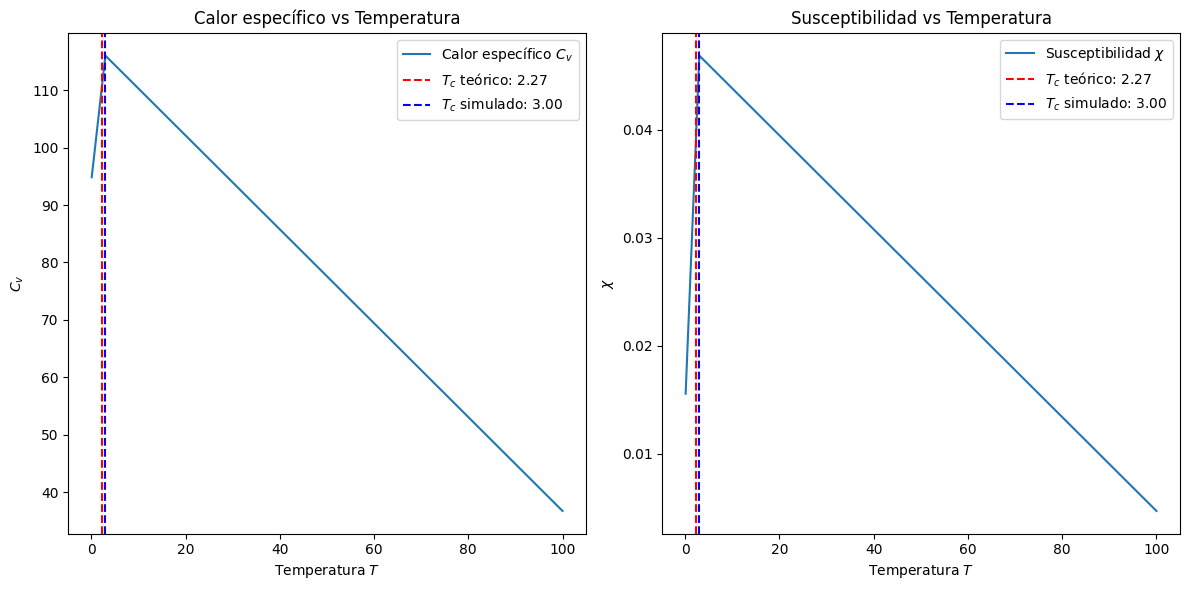

In [ ]:
# Simulación
kB = 1
Cv = []
chi = []
Tc_teo = 2 * J / np.log(np.sqrt(2) + 1)  # Punto crítico teórico
temperatura_critica = 0
max_Cv = 0

def metropolisCX(red, J, H, T, iteraciones):
    energias = []
    magnetizaciones = []
    for _ in range(iteraciones):
        i, j = np.random.randint(0, L, size=2)
        delta_E = 2 * J * red[i, j] * (
            red[(i + 1) % L, j] +
            red[(i - 1) % L, j] +
            red[i, (j + 1) % L] +
            red[i, (j - 1) % L]
        ) + 2 * H * red[i, j]

        if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
            red[i, j] = -red[i, j]

        # Calcular energía y magnetización en cada paso
        energia, magnetizacion = calcular_energia(red, J, H)
        energias.append(energia)
        magnetizaciones.append(magnetizacion)

    return red, np.array(energias), np.array(magnetizaciones)


for T in temperatures:
    beta = 1 / (kB * Tc_teo)

    result = metropolisCX(red, J, H, T, iteraciones)
    energias = result[1]
    magnetizaciones = result[2]

    # Promedios y promedios cuadrados
    E_mean = np.mean(energias)
    E2_mean = np.mean(energias**2)
    M_mean = np.mean(magnetizaciones)
    M2_mean = np.mean(magnetizaciones**2)

    # Calor específico
    cv = beta**2 * (E2_mean - E_mean**2)
    Cv.append(cv)

    # Susceptibilidad
    chi_val = beta * (M2_mean - M_mean**2)
    chi.append(chi_val)

    # Identificar el punto crítico
    if cv > max_Cv:
        max_Cv = cv
        temperatura_critica = T

# Gráficas
plt.figure(figsize=(12, 6))

# Gráfica de C_v
plt.subplot(1, 2, 1)
plt.plot(temperatures, Cv, label="Calor específico $C_v$")
plt.axvline(Tc_teo, color='red', linestyle='--', label=f"$T_c$ teórico: {Tc_teo:.2f}")
plt.axvline(temperatura_critica, color='blue', linestyle='--', label=f"$T_c$ simulado: {temperatura_critica:.2f}")
plt.xlabel('Temperatura $T$')
plt.ylabel('$C_v$')
plt.legend()
plt.title('Calor específico vs Temperatura')

# Gráfica de susceptibilidad
plt.subplot(1, 2, 2)
plt.plot(temperatures, chi, label="Susceptibilidad $\chi$")
plt.axvline(Tc_teo, color='red', linestyle='--', label=f"$T_c$ teórico: {Tc_teo:.2f}")
plt.axvline(temperatura_critica, color='blue', linestyle='--', label=f"$T_c$ simulado: {temperatura_critica:.2f}")
plt.xlabel('Temperatura $T$')
plt.ylabel('$\chi$')
plt.legend()
plt.title('Susceptibilidad vs Temperatura')

plt.tight_layout()
plt.show()

# Parte 2
Verifique este comportamiento numéricamente. Para esto, tomamos redes
con tamaños L = 10 hasta L = 30 con TT = 2^{13}. La temperatura se toma
en el rango de T = Tc − 10−2n, con n = −50, −49, · · · , 49, 50. Trazar el máximo de Cv L2 respecto de ln (L).

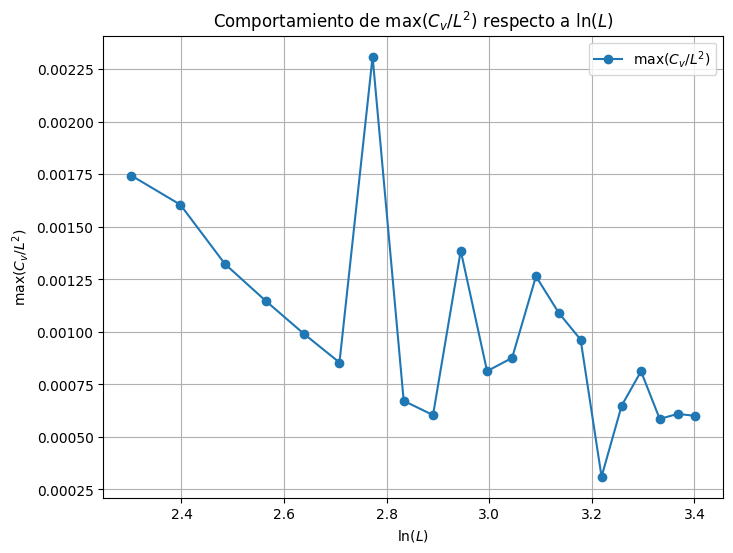

In [ ]:
Tc = 2 * J / np.log(np.sqrt(2) + 1)  # Punto crítico teórico
L_values = range(10, 31)  # Tamaños de red
n_values = np.arange(-50, 51)  # Valores de n
ln_L = np.log(L_values)  # ln(L) para graficar

max_Cv_L2 = []  # Lista para almacenar los máximos de Cv/L^2

for L in L_values:
    Cv_L2 = []  # Lista para almacenar Cv/L^2 para cada T
    for n in n_values:
        T = Tc - 10.0**(-2 * n)
        red = np.random.choice([-1, 1], size=(L, L))  # Red inicial aleatoria
        energias = metropolis(red, J, H, T, iteraciones)

        # Calcular Cv
        beta = 1 / (kB * T)
        E_mean = np.mean(energias)
        E2_mean = np.mean(energias**2)
        cv = beta / T * (E2_mean - E_mean**2)

        # Escalar por L^2
        Cv_L2.append(cv / L**2)

    # Almacenar el máximo de Cv/L^2
    max_Cv_L2.append(max(Cv_L2))

# Graficar máximo de Cv/L^2 vs ln(L)
plt.figure(figsize=(8, 6))
plt.plot(ln_L, max_Cv_L2, 'o-', label=r'$\max(C_v / L^2)$')
plt.xlabel(r'$\ln(L)$')
plt.ylabel(r'$\max(C_v / L^2)$')
plt.title(r'Comportamiento de $\max(C_v / L^2)$ respecto a $\ln(L)$')
plt.legend()
plt.grid(True)
plt.show()
